In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.shape

(614, 13)

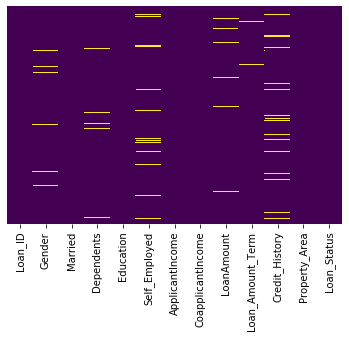

In [4]:
#finding missing value
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
test = pd.read_csv('Test_dummies.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Bin
0,LP002776,Female,No,0,Graduate,No,5000,0,103.0,360,0.0,Semiurban,N,0
1,LP002777,Male,Yes,0,Graduate,No,2785,2016,110.0,360,1.0,Rural,Y,1
2,LP002778,Male,Yes,2,Graduate,Yes,6633,0,NaN,360,0.0,Rural,N,0
3,LP002784,Male,Yes,1,Not Graduate,No,2492,2375,NaN,360,1.0,Rural,Y,1
4,LP002785,Male,Yes,1,Graduate,No,3333,3250,158.0,360,1.0,Urban,Y,1


In [6]:
train.dropna(inplace=True,axis=0)
test.dropna(inplace=True,axis=0)

In [7]:
from scipy import stats
z=stats.zscore(train['LoanAmount'])
train = train[z<3]
z1=stats.zscore(test['LoanAmount'])
test = test[z1<3]

In [8]:
X_train = train[['ApplicantIncome','LoanAmount']]
y_train = pd.get_dummies(train['Loan_Status'],drop_first=True)
X_test = test[['ApplicantIncome','LoanAmount']]
y_test = test[['Loan_Status_Bin']]


In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
predicctions = lm.predict(X_test)

In [11]:
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y_test,predicctions))
print('MSE', metrics.mean_squared_error(y_test,predicctions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predicctions)))

MAE 0.4316576205845752
MSE 0.21932655895355865
RMSE 0.4683231351893249


In [68]:
X_test.loc[0]

CoapplicantIncome      0.0
LoanAmount           103.0
Name: 0, dtype: float64